In [1]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import matplotlib.pyplot as plt 
from time import *
from random import randint

In [3]:
website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(website_url)

response.status_code

200

In [4]:
print(type(response))
response.content

<class 'requests.models.Response'>


b'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' />\n<link rel="profile" href="https://gmpg.org/xfn/11" />\n<link rel="pingback" href="https://countrymusichalloffame.org/wp/xmlrpc.php" />\n<!--[if lt IE 9]>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/html5shiv.js"></script>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-them

In [5]:
soup = BeautifulSoup(response.content, 'lxml')
print(soup.title)

<title>Hall of Fame Members | Country Music Hall of Fame</title>


In [6]:
print(soup)

<!DOCTYPE html>
<html lang="en-US">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');</script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<link href="https://countrymusichalloffame.org/wp/xmlrpc.php" rel="pingback"/>
<!--[if lt IE 9]>
	<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/html5shiv.js"></script>
	<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/respond.min.js"></script>
<![endif]-->
<title>Hall of Fam

In [7]:
names = soup.find_all('h3')
names

[<h3>Roy Acuff</h3>,
 <h3>Alabama</h3>,
 <h3>Bill Anderson</h3>,
 <h3>Eddy Arnold</h3>,
 <h3>Chet Atkins</h3>,
 <h3>Gene Autry</h3>,
 <h3>DeFord Bailey</h3>,
 <h3>Bobby Bare</h3>,
 <h3>Johnny Bond</h3>]

In [8]:
names = [tag.get_text(strip=True) for tag in soup.find_all('h3')]
names

['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Johnny Bond']

In [9]:
years = soup.find_all('p')
years

[<p style="text-align: center;">Open Daily</p>,
 <p></p>,
 <p>Election to the Country Music Hall of Fame is country music's highest honor. The Country Music Association (CMA), the country music industry's trade organization, created the accolade to recognize significant contributions to the advancement of country music by individuals in both the creative and business communities. The first members—Jimmie Rodgers, Fred Rose, and Hank Williams—were inducted in 1961.</p>,
 <p><strong>Interested in supporting the Museum through our Annual Fund or interested in Museum member benefits?</strong></p>,
 <p>
                     Inducted 1962                  </p>,
 <p>
                     Inducted 2005                  </p>,
 <p>
                     Inducted 2001                  </p>,
 <p>
                     Inducted 1966                  </p>,
 <p>
                     Inducted 1973                  </p>,
 <p>
                     Inducted 1969                  </p>,
 <p>
                

In [10]:
dates = [tag.get_text(strip=True) for tag in soup.find_all('p')]
dates_inducted = dates[4:13]
dates_inducted

['Inducted 1962',
 'Inducted 2005',
 'Inducted 2001',
 'Inducted 1966',
 'Inducted 1973',
 'Inducted 1969',
 'Inducted 2005',
 'Inducted 2013',
 'Inducted 1999']

In [11]:
dates_inducted[0][-4:]

'1962'

In [12]:
dates_all = [tag.get_text(strip=True) for tag in soup.find_all('p')]
dates_induct = dates_all[4:13]
dates_induct

['Inducted 1962',
 'Inducted 2005',
 'Inducted 2001',
 'Inducted 1966',
 'Inducted 1973',
 'Inducted 1969',
 'Inducted 2005',
 'Inducted 2013',
 'Inducted 1999']

In [14]:
def remove_induct(s):
    return s[-4:]
dates_cleaned = [remove_induct(s) for s in dates_induct]
dates = list(dates_cleaned)
dates

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']

In [15]:
pd.DataFrame.from_dict({'Name' : names,
                       'Year Inducted' : dates,
                       }, orient= 'index').transpose()

,Name,Year Inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999


In [16]:
data = []

for i in range(1, 17):

    website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/' + str(i)
    print(website_url)
    x = randint(2,6) 
    print(x) 
    sleep(x) 
    print(f'I waited {x} seconds')
    response = requests.get(website_url)
    print(response.status_code)
    data.append(response.content)
    len(data)
    data = []
    soup = BeautifulSoup(response.content, 'lxml')
    names = [tag.get_text(strip=True) for tag in soup.find_all('h3')]
    print(names)
    dates = [tag.get_text(strip=True) for tag in soup.find_all('p')]
    dates_inducted = dates[4:13]
    def remove_induct(s):
        return s[-4:]
    dates_cleaned = [remove_induct(s) for s in dates_induct]
    dates = list(dates_cleaned)
    print(dates)

https://countrymusichalloffame.org/hall-of-fame/members/page/1
5
I waited 5 seconds
200
['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond']
['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']
https://countrymusichalloffame.org/hall-of-fame/members/page/2
3
I waited 3 seconds
200
['Bobby Braddock', 'Harold Bradley', 'Jerry Bradley', 'Owen Bradley', 'Rod Brasfield', 'Garth Brooks', 'Brooks & Dunn', 'Jim Ed Brown', 'Jim Ed Brown and the Browns']
['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']
https://countrymusichalloffame.org/hall-of-fame/members/page/3
4
I waited 4 seconds
200
['Boudleaux and Felice Bryant', 'Glen Campbell', 'Bill Carlisle', 'Carter Family', 'Johnny Cash', 'Roy Clark', 'Cowboy Jack Clement', 'Patsy Cline', 'Hank Cochran']
['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']
https://countrymusichalloffame.org/hall-of-fame/membe

In [17]:
data = []

for i in range(1, 17):

    website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/' + str(i)
    x = randint(2,6)  
    sleep(x) 
    response = requests.get(website_url)
    data.append(response.content)
    len(data)
    data = []
    soup = BeautifulSoup(response.content, 'lxml')
    names = [tag.get_text(strip=True) for tag in soup.find_all('h3')]
    print(names)
    dates = [tag.get_text(strip=True) for tag in soup.find_all('p')]
    dates_inducted = dates[4:13]
    def remove_induct(s):
        return s[-4:]
    dates_cleaned = [remove_induct(s) for s in dates_induct]
    dates = list(dates_cleaned)
    print(dates)

['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond']
['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']
['Bobby Braddock', 'Harold Bradley', 'Jerry Bradley', 'Owen Bradley', 'Rod Brasfield', 'Garth Brooks', 'Brooks & Dunn', 'Jim Ed Brown', 'Jim Ed Brown and the Browns']
['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']
['Boudleaux and Felice Bryant', 'Glen Campbell', 'Bill Carlisle', 'Carter Family', 'Johnny Cash', 'Roy Clark', 'Cowboy Jack Clement', 'Patsy Cline', 'Hank Cochran']
['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']
['Paul Cohen', 'Floyd Cramer', 'Vernon Dalhart', 'Charlie Daniels', 'Jimmie Davis', 'Jimmy Dean', 'Delmore Brothers', 'Jim Denny', 'Little Jimmy Dickens']
['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']
['Ralph Emery', 'The Everly Brothers', 'Flatt And Scruggs', 'Jim Foglesong', 'Red Foley',

In [18]:
data = []
names_list = []
dates_list = []

for i in range(1, 17):

    website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/' + str(i)
    response = requests.get(website_url)
    data.append(response.content)
    len(data)
    soup = BeautifulSoup(response.content, 'lxml')
    names = [tag.get_text(strip=True) for tag in soup.find_all('h3')]
    names_list.extend(names)
    dates_all = [tag.get_text(strip=True) for tag in soup.find_all('p')]
    dates_induct = dates_all[4:13]
    def remove_induct(s):
        return s[-4:]
    dates_cleaned = [remove_induct(s) for s in dates_induct]
    dates = list(dates_cleaned)
    dates_list.extend(dates_cleaned)
print(names_list)
print(dates_list)

['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond', 'Bobby Braddock', 'Harold Bradley', 'Jerry Bradley', 'Owen Bradley', 'Rod Brasfield', 'Garth Brooks', 'Brooks & Dunn', 'Jim Ed Brown', 'Jim Ed Brown and the Browns', 'Boudleaux and Felice Bryant', 'Glen Campbell', 'Bill Carlisle', 'Carter Family', 'Johnny Cash', 'Roy Clark', 'Cowboy Jack Clement', 'Patsy Cline', 'Hank Cochran', 'Paul Cohen', 'Floyd Cramer', 'Vernon Dalhart', 'Charlie Daniels', 'Jimmie Davis', 'Jimmy Dean', 'Delmore Brothers', 'Jim Denny', 'Little Jimmy Dickens', 'Ralph Emery', 'The Everly Brothers', 'Flatt And Scruggs', 'Jim Foglesong', 'Red Foley', 'Tennessee Ernie Ford', 'Fred Foster', 'Joseph Frank', 'Lefty Frizzell', 'Connie B. Gay', 'Don Gibson', 'Vince Gill', 'Johnny Gimble', 'Merle Haggard', 'Tom T. Hall', 'Emmylou Harris', 'George D. Hay', 'Homer and Jethro', 'Roy Horton', 'Harlan Howard', 'Ferlin Husky', 'Alan Jackson', 'Sonny Jam

In [19]:
combined_df = pd.DataFrame(zip(names_list,dates_list), columns= ['Name', 'Year'] )
combined_df

,Name,Year
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
135,Hank Williams,1961
136,Bob Wills,1968
137,Mac Wiseman,2014
138,Tammy Wynette,1998


<AxesSubplot:xlabel='Name', ylabel='Year'>

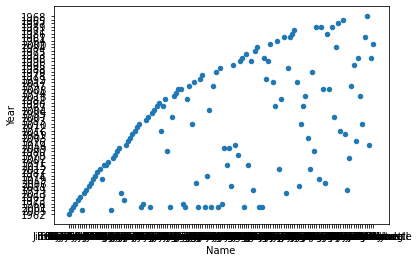

In [20]:
combined_df.plot(x ='Name', y='Year', kind = 'scatter')

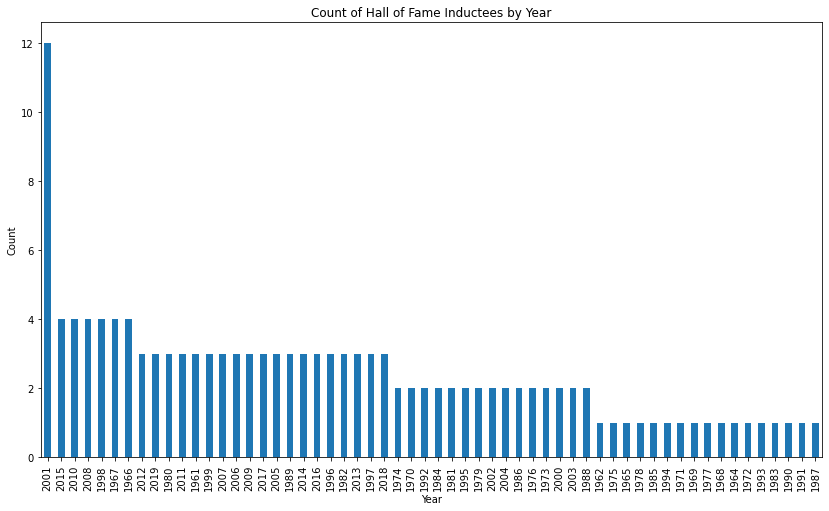

In [21]:
ax = combined_df['Year'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Hall of Fame Inductees by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Count");